<a href="https://colab.research.google.com/github/Kabshah/AI-Learn/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso

## 1. Data Upload

In [ ]:
file_path = '/content/drive/MyDrive/Clean_Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
119575,119575,Vistara,UK-808,Bangalore,Early_Morning,one,Morning,Chennai,Economy,25.92,48,6161
34750,34750,Vistara,UK-977,Delhi,Evening,one,Afternoon,Hyderabad,Economy,17.33,45,6172
75611,75611,Vistara,UK-928,Mumbai,Early_Morning,one,Afternoon,Hyderabad,Economy,6.08,38,4414
181429,181429,SpiceJet,SG-520,Chennai,Afternoon,one,Evening,Delhi,Economy,26.58,10,15438
287715,287715,Air_India,AI-672,Chennai,Afternoon,one,Morning,Delhi,Business,19.83,4,45185


In [ ]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
df.shape

(300153, 12)

## 2. Data Cleaning

### 2.1 Missing/Null Values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


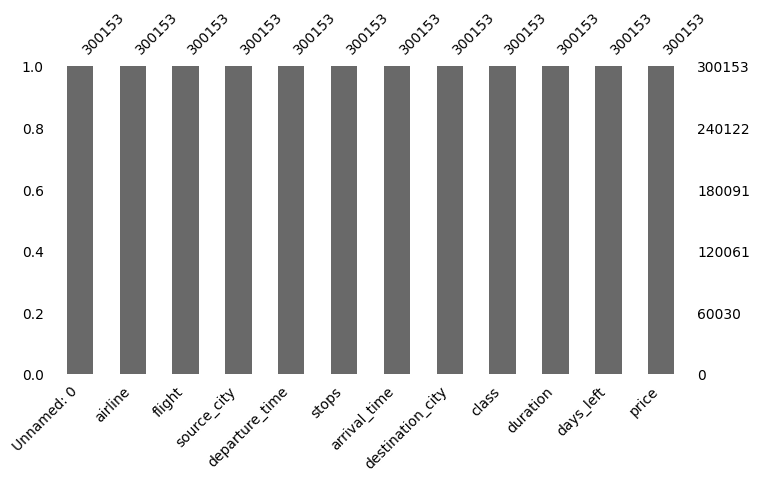

In [ ]:
plt.figure(figsize=(18,4))
axz=plt.subplot(1,2,2)
mso.bar(df, ax=axz,fontsize=10);

### 2.2 Drop irrelevant features

In [ ]:
# prompt: drop columns Unnamed: 0 and flight

df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### 2.3 Duplicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", df[duplicates].shape[0])
print(df[duplicates])

df = df.drop_duplicates()


Number of Duplicate Rows: 2213
         airline source_city departure_time stops arrival_time  \
10      GO_FIRST       Delhi      Afternoon  zero      Evening   
155      Vistara       Delhi      Afternoon  zero      Evening   
401     SpiceJet       Delhi  Early_Morning  zero      Morning   
403     SpiceJet       Delhi        Evening  zero        Night   
405      Vistara       Delhi      Afternoon  zero      Evening   
...          ...         ...            ...   ...          ...   
254827   Vistara   Bangalore        Evening   one      Morning   
254890   Vistara   Bangalore        Evening   one      Morning   
255218   Vistara   Bangalore        Evening   one      Morning   
255291   Vistara   Bangalore        Evening   one      Morning   
255354   Vistara   Bangalore        Evening   one      Morning   

       destination_city     class  duration  days_left  price  
10               Mumbai   Economy      2.25          1   5954  
155              Mumbai   Economy      2.17    

### 2.4 Data Consistency

In [ ]:
data_types = df.dtypes
data_types

,0
airline,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64
price,int64


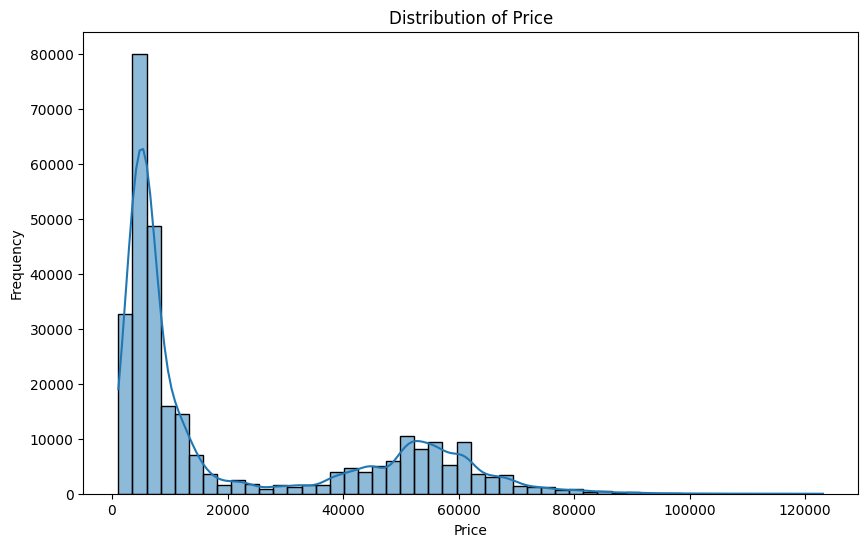

In [ ]:
# prompt: show price distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 2.5 Outlier Detection

In [ ]:
# prompt: find an  array of numerical features of dataset

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['duration', 'days_left', 'price']

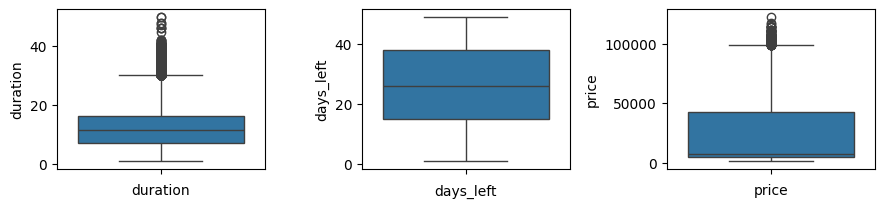

In [ ]:
c = 1
plt.figure(figsize=(12, 8))

for i in numerical_features:
    plt.subplot(4, 4, c)
    sns.boxplot(df[i])
    plt.xlabel(i)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
# prompt: remove outliers for numerical values only using this

numerical_df = df.select_dtypes(include=np.number)

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))

# Create a mask that is True for rows that do NOT contain any outliers in numerical columns
mask_no_outliers = ~outliers.any(axis=1)

# Filter the original DataFrame using the mask
df_no_outliers = df[mask_no_outliers].copy()

print("Original DataFrame shape:", df.shape)
print("DataFrame without outliers shape:", df_no_outliers.shape)

Original DataFrame shape: (297940, 10)
DataFrame without outliers shape: (295591, 10)


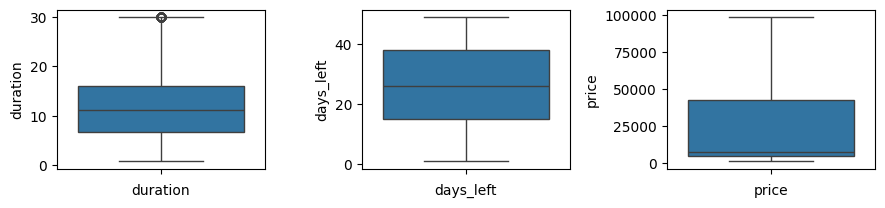

In [ ]:
c = 1
plt.figure(figsize=(12, 8))

for i in numerical_features:
    plt.subplot(4, 4, c)
    sns.boxplot(df_no_outliers[i])
    plt.xlabel(i)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
df = df_no_outliers

# 3. Exploratory Data Analysis

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  3


,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


In [ ]:
df.describe()

,duration,days_left,price
count,295591.000000,295591.000000,295591.000000
mean,12.126042,26.041206,20969.097966
std,6.970378,13.545459,22710.635022
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4784.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42546.000000
max,30.000000,49.000000,98972.000000


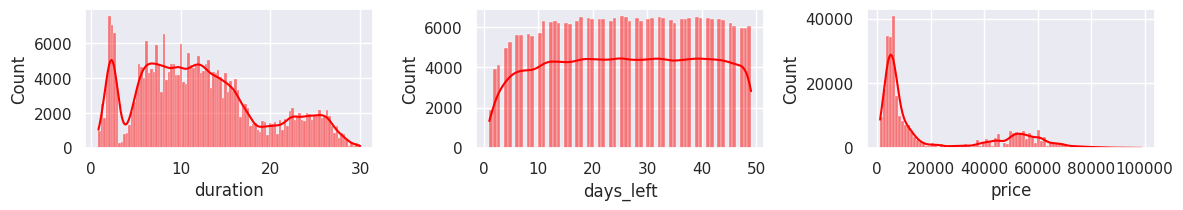

In [ ]:
c = 1
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

for i in numerical_features:
    plt.subplot(4, 3, c)
    sns.histplot(data=df,x=df[i],kde=True,color='red')
    plt.xlabel(i)
    c = c + 1

plt.tight_layout()
plt.show()

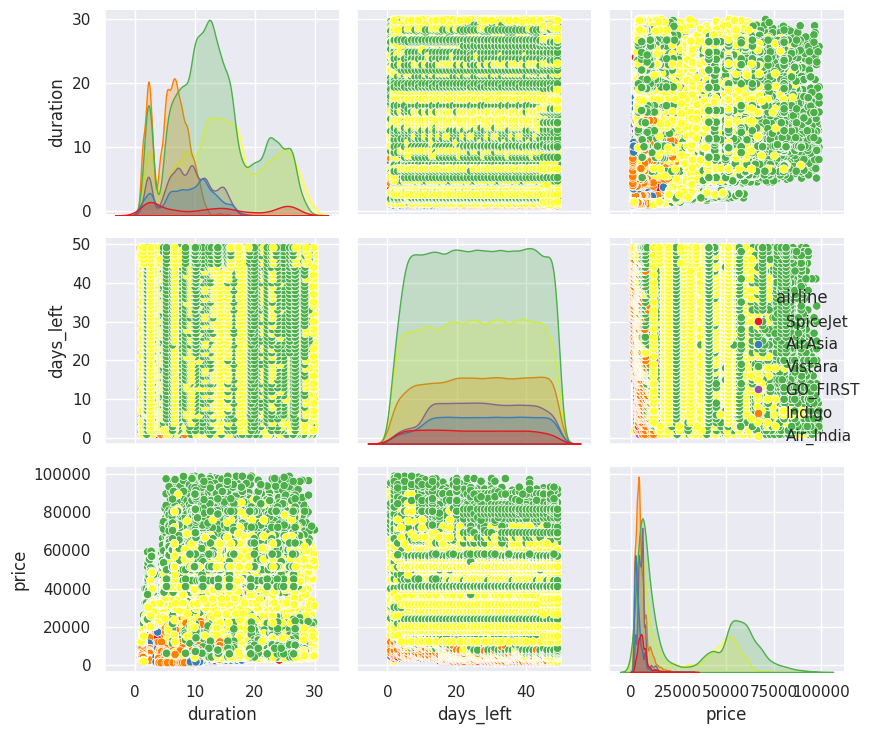

In [ ]:
sns.pairplot(df, hue='airline', palette='Set1')
plt.tight_layout()
plt.show()

<Axes: >

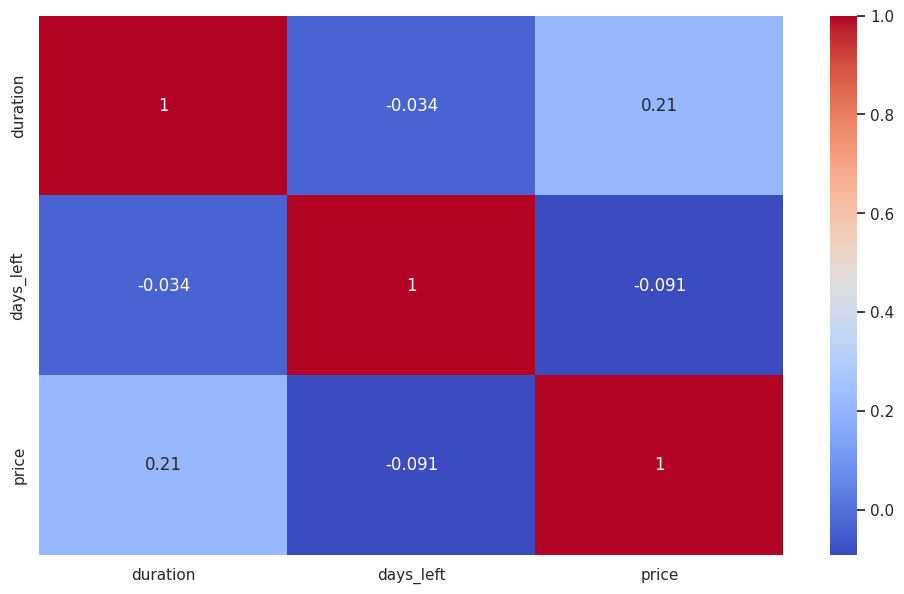

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df[numerical_features].corr(),annot=True,cmap='coolwarm')

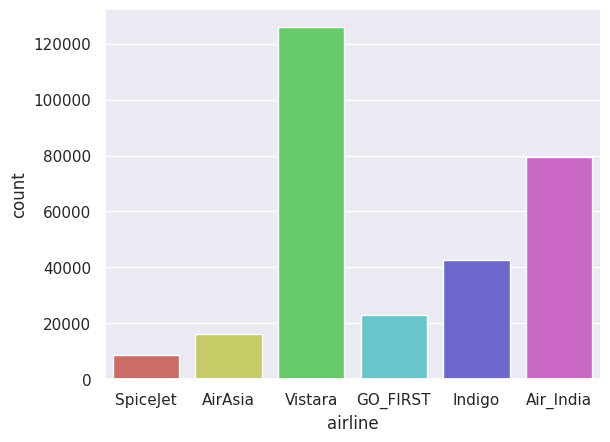

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="airline", data=df, palette="hls")
plt.show()

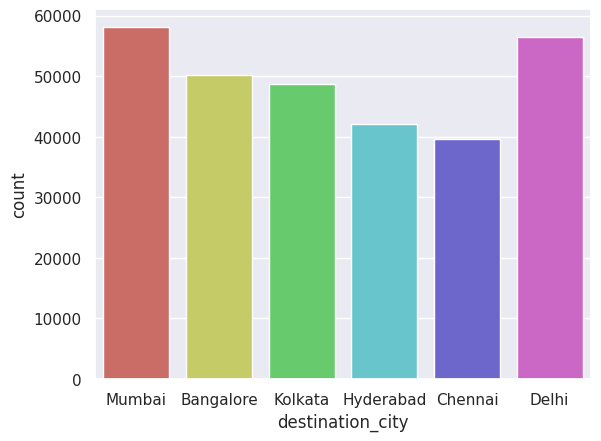

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="destination_city", data=df, palette="hls")
plt.show()

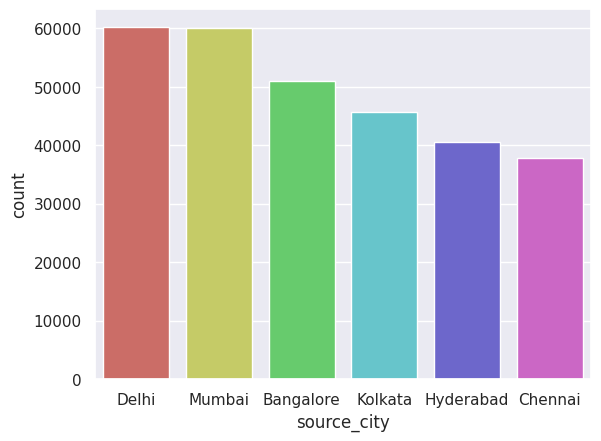

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="source_city", data=df, palette="hls")
plt.show()

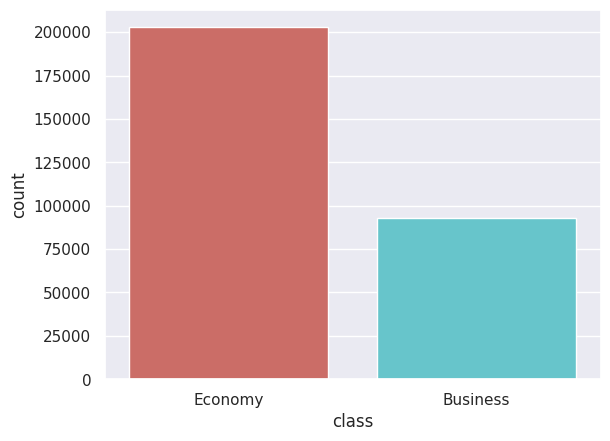

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="class", data=df, palette="hls")
plt.show()